In [54]:
#Importando a função criada no arquivo #pegar_historico.py
from pegar_historico import pegar_historico
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:


#Testando a função para o par de trding BTCBRL
par = "BTCBRL"
intervalo = "1d"
data_inicio = "1 Jan 2025"

df_btcbrl = pegar_historico(
        par,
        intervalo,
        data_inicio
    )

df_btcbrl.head(5)

,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,2025-01-01,583135.0,591233.0,579057.0,588693.0,72.14957,1735775999999,42310167.57540000,21358,41.00811000,24046544.55393000,0
1,2025-01-02,588635.0,607111.0,587263.0,599306.0,166.56756,1735862399999,99793602.55375000,47531,78.05491000,46770433.42530000,0
2,2025-01-03,599363.0,613793.0,594140.0,607582.0,128.54397,1735948799999,77592339.31612000,39792,61.49631000,37100120.06508000,0
3,2025-01-04,607593.0,612902.0,604369.0,609413.0,64.64526,1736035199999,39296764.14958000,27377,31.38893000,19078907.64598000,0
4,2025-01-05,609412.0,613000.0,604300.0,611273.0,58.20556,1736121599999,35453798.90673000,22973,27.81086000,16944045.55734000,0


In [24]:
cols = ['open', 'high', 'low', 'close']

# O metodo 'describe' de forma prática diversa estatisticas do nosso dataframe de varias colunas de uma só vez

# Estatisticas comun como Média, Desvio Padrão, valor máximo, valor minimo
df_btcbrl[cols].describe()

,open,high,low,close
count,147.000000,147.000000,147.000000,147.000000
mean,546992.829932,556598.027211,536425.312925,547251.789116
std,50693.548857,51125.810578,50935.148368,51002.205625
min,460296.000000,477078.000000,439016.000000,460241.000000
25%,496609.500000,504849.500000,490627.500000,496570.500000
50%,552784.000000,556387.000000,544573.000000,552784.000000
75%,589766.500000,597884.500000,582436.000000,590621.000000
max,641734.000000,665446.000000,620858.000000,641806.000000


In [38]:
#Renomeado o index para traduzir os campos

#O index é a primeira coluna, onde no momento há "count, mean, std, etc..."

stats = df_btcbrl[cols].describe()

stats.index = ['Quantidade', 'Média', 'Desvio Padrão', 'Valor Mínimo', 'Primeiro Quartil', 'Segundo Quartil', 'Terceiro Quartil', 'Valor Máximo']
stats

,open,high,low,close
Quantidade,147.000000,147.000000,147.000000,147.000000
Média,546992.829932,556598.027211,536425.312925,547251.789116
Desvio Padrão,50693.548857,51125.810578,50935.148368,51002.205625
Valor Mínimo,460296.000000,477078.000000,439016.000000,460241.000000
Primeiro Quartil,496609.500000,504849.500000,490627.500000,496570.500000
Segundo Quartil,552784.000000,556387.000000,544573.000000,552784.000000
Terceiro Quartil,589766.500000,597884.500000,582436.000000,590621.000000
Valor Máximo,641734.000000,665446.000000,620858.000000,641806.000000


In [44]:
#Utilizado a função built in do python "Round" para arredondar os valores para 3 casas decimais

round(stats, #Variavel que irá ser arredondada 
      3 #Quantidade de casa decimais
)

,open,high,low,close
Quantidade,147.000,147.000,147.000,147.000
Média,546992.830,556598.027,536425.313,547251.789
Desvio Padrão,50693.549,51125.811,50935.148,51002.206
Valor Mínimo,460296.000,477078.000,439016.000,460241.000
Primeiro Quartil,496609.500,504849.500,490627.500,496570.500
Segundo Quartil,552784.000,556387.000,544573.000,552784.000
Terceiro Quartil,589766.500,597884.500,582436.000,590621.000
Valor Máximo,641734.000,665446.000,620858.000,641806.000


## Correlação de pearson

In [48]:

par = "BTCBRL"
intervalo = "1d"
data_inicio = "1 Jan 2025"

df_btcbrl = pegar_historico(
        par,
        intervalo,
        data_inicio
    )

#Criando Par de ETHBRL
par = "ETHBRL"
intervalo = "1d"
data_inicio = "1 Jan 2025"

df_ethbrl = pegar_historico(
        par,
        intervalo,
        data_inicio
    )

df_btceth_close = pd.DataFrame({
    'BTC_close':df_btcbrl['close'],
    'ETH_close':df_ethbrl['close']    
})

df_btceth_close.head(5)


correlacao = df_btceth_close.corr()
correlacao

,BTC_close,ETH_close
BTC_close,1.000000,0.792878
ETH_close,0.792878,1.000000


Text(0.5, 1.0, 'Mapa de Calor - altcoins - últimos 5 meses')

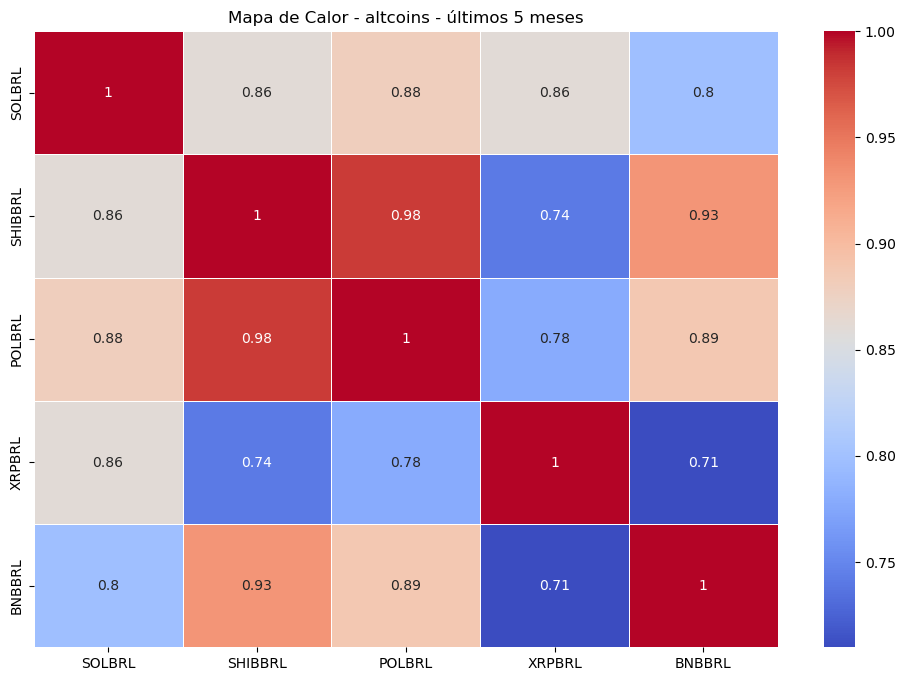

In [58]:
#Correlação de pearson com heatmap

#Criando uma lista com o par de trading para cada alt coin desejada
pares = ["SOLBRL", "SHIBBRL","POLBRL","XRPBRL","BNBBRL"]

#O resto segue o mesmo
intervalo = "1d"
data_inicio = "1 Jan 2025"

df_memecoins = pd.DataFrame()

for token in pares:
    df_memecoins[token] = pegar_historico(token, intervalo, data_inicio)['close']
    
plt.figure(figsize=(12, 8))
sns.heatmap(df_memecoins.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor - altcoins - últimos 5 meses')